<a href="https://colab.research.google.com/github/wittawinw/css324-assignment1/blob/main/css324_hw2_6322774488.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# CSS324 Homework Assignment 2
## Group Member
#1.Wittawin Wattanasup 6322774488

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [23]:
(x, y), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y, y_test = y.flatten(), y_test.flatten()
x = x / 255
x_test = x_test / 255

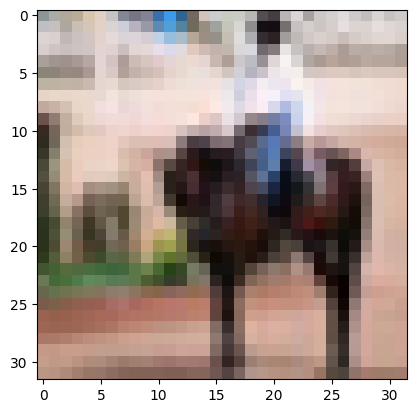

Class= 7


In [24]:
plt.imshow(x[11, :, :, :])
plt.show()
print(f"Class= {y[11]}")  # 7 = horse


In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=11)
X_test = x_test


In [26]:
Y_train = tf.one_hot(y_train, 10)
Y_valid = tf.one_hot(y_valid, 10)
Y_test = tf.one_hot(y_test, 10)

In [27]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)


In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [29]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_20 (Dense)            (None, 256)               2097408   
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                2570      
                                                      

In [30]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy', metrics=['accuracy'])


In [31]:
checkpoint_path = "best_model.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)


In [32]:
history = model.fit(datagen.flow(X_train, Y_train, batch_size=128),
                    validation_data=(X_valid, Y_valid),
                    epochs=50,
                    callbacks=[checkpoint])

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 1.9954 - accuracy: 0.2820
Epoch 1: val_accuracy improved from -inf to 0.39670, saving model to best_model.h5
313/313 [==============================] - 76s 240ms/step - loss: 1.9954 - accuracy: 0.2820 - val_loss: 1.7602 - val_accuracy: 0.3967
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 1.7906 - accuracy: 0.3629
Epoch 2: val_accuracy improved from 0.39670 to 0.43020, saving model to best_model.h5
313/313 [==============================] - 76s 242ms/step - loss: 1.7906 - accuracy: 0.3629 - val_loss: 1.6370 - val_accuracy: 0.4302
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 1.6973 - accuracy: 0.3930
Epoch 3: val_accuracy improved from 0.43020 to 0.44710, saving model to best_model.h5
313/313 [==============================] - 75s 239ms/step - loss: 1.6973 - accuracy: 0.3930 - val_loss: 1.5596 - val_accuracy: 0.4471
Epoch 4/50
313/313 [==============================] - E

In [33]:
model.load_weights(checkpoint_path)

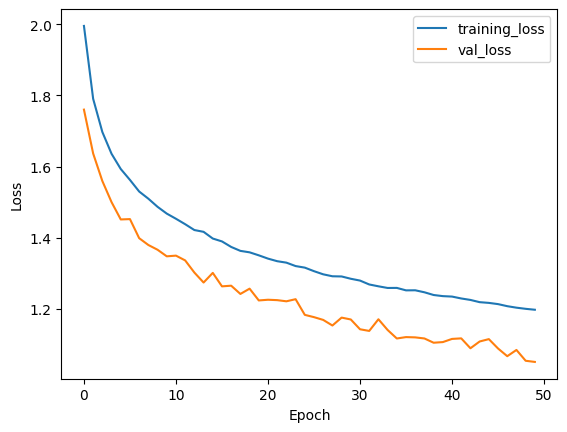

In [34]:
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
train_accuracy = model.evaluate(X_train, Y_train, verbose=0)[1]
valid_accuracy = model.evaluate(X_valid, Y_valid, verbose=0)[1]
test_accuracy = model.evaluate(X_test, Y_test, verbose=0)[1]

print(f"Training accuracy   = {train_accuracy:.4f}")
print(f"Validation accuracy = {valid_accuracy:.4f}")
print(f"Test accuracy       = {test_accuracy:.4f}")


Training accuracy   = 0.6453
Validation accuracy = 0.6313
Test accuracy       = 0.6304


In [36]:
if test_accuracy >= 0.6:
    print("Accuracy meets the requirement.")
else:
    print("Accuracy does not meet the requirement.")

Accuracy meets the requirement.
